In [338]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

## Loading data

In [339]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

C:\Users\nagam\AppData\Local\Temp\ipykernel_15408\378180666.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [340]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [341]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN


In [342]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [343]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [344]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [345]:
print(books.isnull().sum()/len(books)*100)

ISBN                  0.000
Book-Title            0.000
Book-Author           0.001
Year-Of-Publication   0.000
Publisher             0.001
Image-URL-S           0.000
Image-URL-M           0.000
Image-URL-L           0.001
dtype: float64


In [346]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [347]:
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [348]:
books[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [349]:
books.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books.loc[129037, 'Publisher'] = 'Bantam'

In [350]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [351]:
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [352]:
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [353]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [354]:
books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN=='2070426769','Publisher']='Gallimard'
books.loc[books.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [355]:
books.loc[books['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [356]:
books['Year-Of-Publication'] =books['Year-Of-Publication'].astype(int)

In [357]:
books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [358]:
books.loc[books.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books.loc[books.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [359]:
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN


books['Year-Of-Publication'].fillna(int(books['Year-Of-Publication'].median()), inplace=True)

In [360]:
books['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: count, Length: 102021, dtype: int64

In [361]:
books['Publisher'].value_counts()

Publisher
Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: count, Length: 16804, dtype: int64

In [362]:
books.loc[books.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [363]:
books['ISBN']=books['ISBN'].str.upper()
books['Book-Author']=books['Book-Author'].str.upper()

In [364]:
books[books['Book-Title']=='Emma']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,JANE AUSTEN,1994.000,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.LZZZZZZZ.jpg
8763,055321019X,Emma,JANE AUSTEN,1981.000,Bantam Books,http://images.amazon.com/images/P/055321019X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.LZZZZZZZ.jpg
11571,0553212737,Emma,JANE AUSTEN,1984.000,Bantam,http://images.amazon.com/images/P/0553212737.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.LZZZZZZZ.jpg
14263,0140258175,Emma,JANE AUSTEN,1996.000,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.LZZZZZZZ.jpg
45955,B000051WXP,Emma,JANE AUSTEN,1996.000,Random House,http://images.amazon.com/images/P/B000051WXP.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.LZZZZZZZ.jpg
53513,0760701652,Emma,JANE AUSTEN,1996.000,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.LZZZZZZZ.jpg
90473,2253140732,Emma,JANE AUSTEN,1997.000,LGF,http://images.amazon.com/images/P/2253140732.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.LZZZZZZZ.jpg
106616,0460010247,Emma,JANE AUSTEN,1976.000,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.LZZZZZZZ.jpg
133269,0553211595,Emma,JANE AUSTEN,1984.000,Bantam,http://images.amazon.com/images/P/0553211595.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.LZZZZZZZ.jpg
166404,0681218894,Emma,JANE AUSTEN,1996.000,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.LZZZZZZZ.jpg


In [365]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,JAMES FINN GARNER,1994.000,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.000,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,MICHELLE GROCE,2003.000,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.000,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.000,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.000,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.000,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",DIANA PALMER,1997.000,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,SIMON LOGAN,2002.000,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [366]:
books.drop_duplicates(keep="first",inplace=True)
books.reset_index(drop=True,inplace=True)   

In [367]:
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [368]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271047 non-null  object 
 1   Book-Title           271047 non-null  object 
 2   Book-Author          271046 non-null  object 
 3   Year-Of-Publication  271047 non-null  float64
 4   Publisher            271047 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.3+ MB


# **Users Data**


---




In [369]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [370]:
users[users['User-ID'].duplicated()].sum()

User-ID        0
Location       0
Age        0.000
dtype: object

In [371]:
print(users.isnull().sum()/len(users)*100)

User-ID     0.000
Location    0.000
Age        39.720
dtype: float64


In [372]:
users['Age'].describe()

count   168096.000
mean        34.751
std         14.428
min          0.000
25%         24.000
50%         32.000
75%         44.000
max        244.000
Name: Age, dtype: float64

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age'>

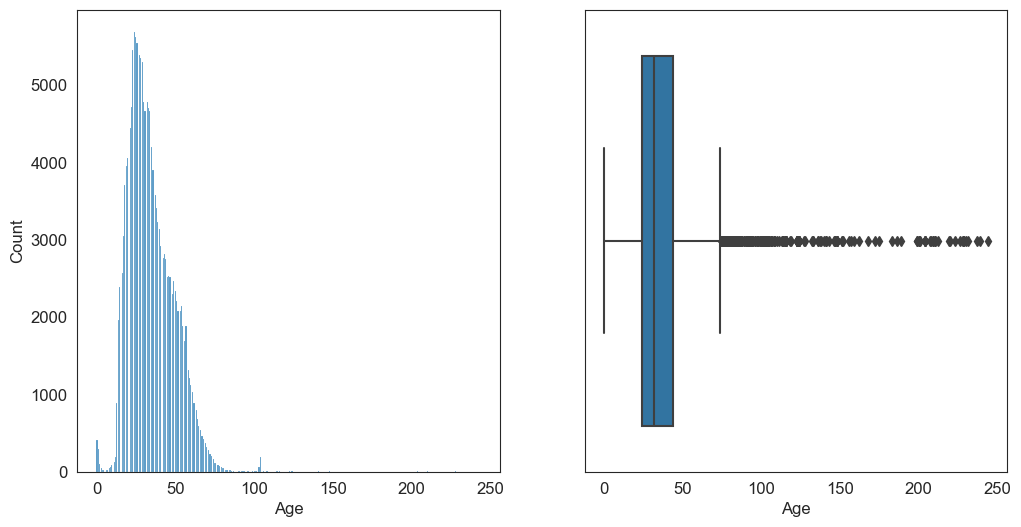

In [373]:
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users)

In [374]:
users.loc[(users['Age']>95)|(users['Age']<4),'Age']=np.nan

In [375]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users['Age'].describe()

The number of missing values is  112001


count   166857.000
mean        34.734
std         13.622
min          4.000
25%         24.000
50%         32.000
75%         44.000
max         95.000
Name: Age, dtype: float64

In [376]:
# create a normal distribution pd.Series to fill Nan values with
normal_age_series = pd.Series(np.random.normal(loc=users.Age.mean(), scale=users.Age.std(), size=users[users.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=np.abs(normal_age_series)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users = users.sort_values('Age',na_position='first').reset_index(drop=True)
users.Age.fillna(round(abs_age_series), inplace = True)  


In [377]:
#after imputation
users.Age.describe()

count   278858.000
mean        34.776
std         13.593
min          0.000
25%         25.000
50%         33.000
75%         44.000
max         99.000
Name: Age, dtype: float64

In [378]:
#percentage of missing values in 'Age' column
(users['Age'].isnull().sum()/len(users))*100


0.0

In [379]:
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [380]:
users['Age_group']=users['Age'].apply(lambda x: age_group(x))

In [381]:
#number of unique values in 'Location'
users['Location'].nunique()

57339

In [382]:
#extracting the country names from users_df
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [383]:
#Displaying the country names
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [384]:
#correcting the mispelled country names
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 


In [385]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [386]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)

In [387]:
users.columns

Index(['User-ID', 'Age', 'Age_group', 'Country'], dtype='object')

In [388]:
users.Country.value_counts()

Country
USA               139746
CANADA             21658
UK                 18565
GERMANY            17074
SPAIN              13258
                   ...  
ROSARIO                1
BURKINAFASU            1
ADSGFDR                1
HENRY                  1
SAN BERNARDINO         1
Name: count, Length: 473, dtype: int64

## **Ratings data**


---



In [389]:
#displaying the first 5 rows
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [390]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [391]:
# checking null values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [393]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(ratings['User-ID'].nunique(), ratings['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [394]:
# making all the ISBN no. uppercase
ratings['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [395]:
# checking for duplicates
ratings[ratings.duplicated()].sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

In [396]:
# lets see if all the books in rating_df are also in books_df
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [397]:
print('Shape of ratings: {} and ratings_new: {}'.format(ratings.shape, ratings_new.shape))

Shape of ratings: (1149780, 3) and ratings_new: (1030617, 3)


In [398]:
# book ratings
ratings_new['Book-Rating'].value_counts().reset_index()

,Book-Rating,count
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


In [399]:
# most popular books
ratings_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585


In [400]:
explicit_rating = ratings_new[ratings_new['Book-Rating'] != 0]
implicit_rating = ratings_new[ratings_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [401]:
# most purchased books including the implicitely rated books
ratings_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [402]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.000,Too Far
118,0671027360,Angels &amp; Demons,DAN BROWN,2001.000,Pocket Star
305,044023722X,A Painted House,JOHN GRISHAM,2001.000,Dell Publishing Company
356,0142001740,The Secret Life of Bees,SUE MONK KIDD,2003.000,Penguin Books
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.000,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.000,Picador USA
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),BILLIE LETTS,1998.000,Warner Books
748,0385504209,The Da Vinci Code,DAN BROWN,2003.000,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.000,Perennial
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.000,Vintage Books USA


In [403]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [404]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.000,Too Far
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.000,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.000,Picador USA
748,0385504209,The Da Vinci Code,DAN BROWN,2003.000,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.000,Perennial


## **Merging Datasets**

---






In [405]:
# for the rating dataset, we are only taking the explicit rating dataset
data = pd.merge(books, explicit_rating, on='ISBN', how='inner')
data = pd.merge(data, users, on='User-ID', how='inner')

In [406]:
#shape of the merged dataframe 'df'
data.shape

(383693, 10)

In [407]:
#displaying the top 3 rows of df
data.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.000,HarperFlamingo Canada,8,5,25.000,Youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.000,Scribner,8,5,25.000,Youth,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.000,House of Anansi Press,8,5,25.000,Youth,CANADA


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383693 entries, 0 to 383692
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383692 non-null  object 
 3   Year-Of-Publication  383693 non-null  float64
 4   Publisher            383693 non-null  object 
 5   User-ID              383693 non-null  int64  
 6   Book-Rating          383693 non-null  int64  
 7   Age                  383693 non-null  float64
 8   Age_group            383693 non-null  object 
 9   Country              383693 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 29.3+ MB


## **EDA**

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

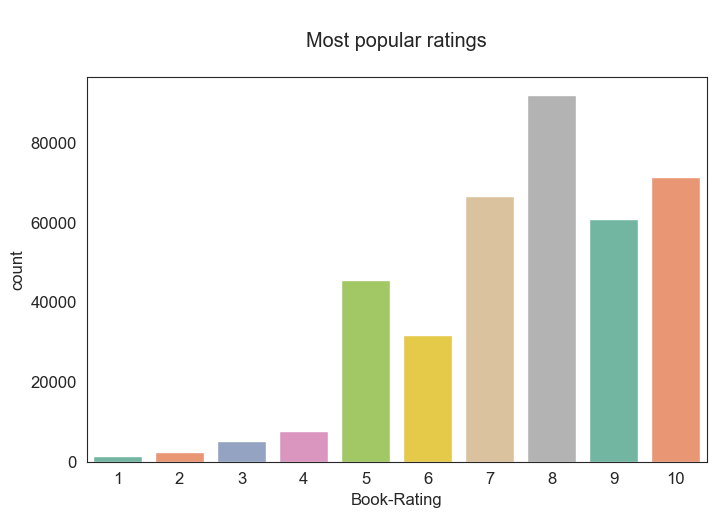

In [409]:
# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=data, x='Book-Rating',palette='Set2')

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book-Title'>

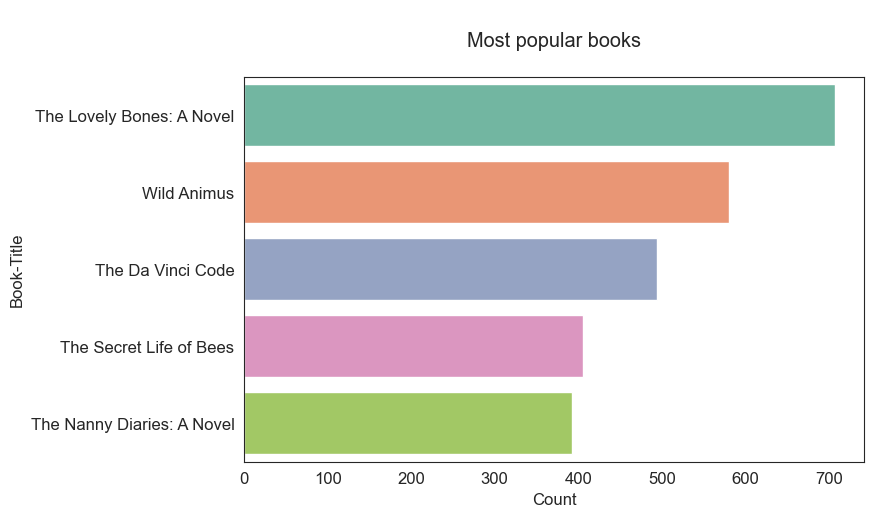

In [410]:
# top 5 most popular books

popular = data.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

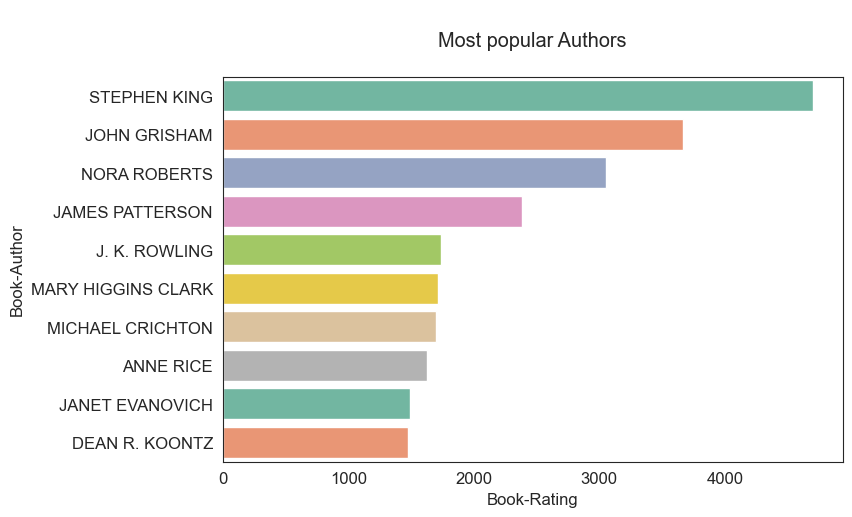

In [411]:
# most popular book authors
author = data.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

C:\Users\nagam\AppData\Local\Temp\ipykernel_15408\3494032849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age.Age)
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

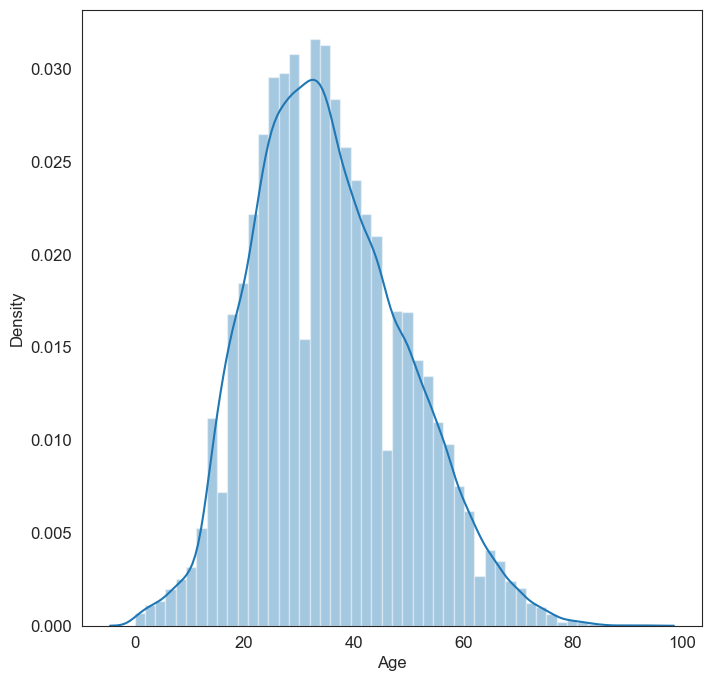

In [412]:
#Age distribution of users
age=users[users['User-ID'].isin(list(data['User-ID'].unique()))]
sns.distplot(age.Age)

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'No of users')

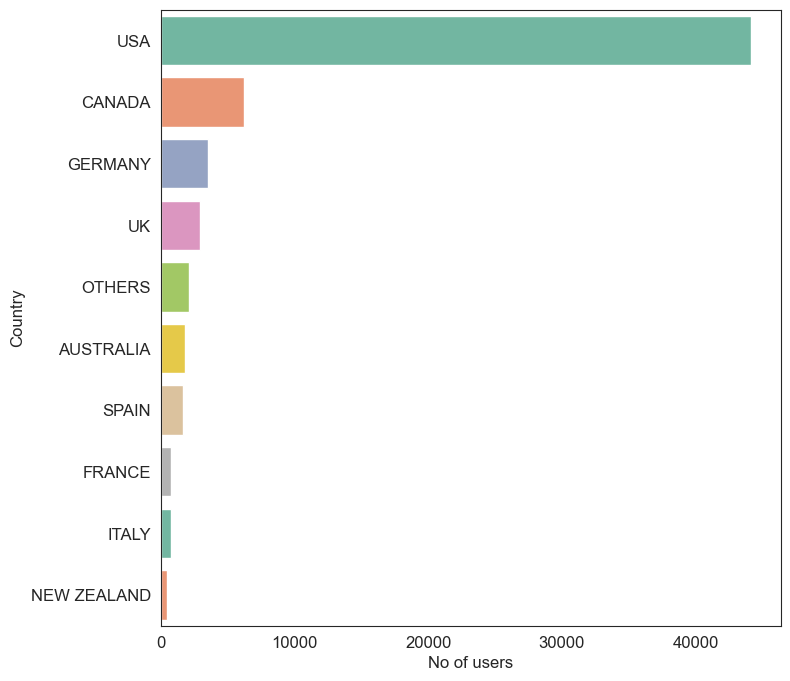

In [413]:
# countries with most readers
countries = data.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

In [414]:
#How many users have rated atleast 1 book?
data['User-ID'].value_counts()

User-ID
11676     6940
98391     5692
189835    1899
153662    1846
23902     1180
          ... 
37259        1
53095        1
51124        1
235548       1
259679       1
Name: count, Length: 68080, dtype: int64

There are 68080 users who have rated atleast one book

In [415]:
data.groupby('User-ID')['Book-Rating'].count().describe()

count   68080.000
mean        5.636
std        41.737
min         1.000
25%         1.000
50%         1.000
75%         3.000
max      6940.000
Name: Book-Rating, dtype: float64

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Book-Title', ylabel='Publisher'>

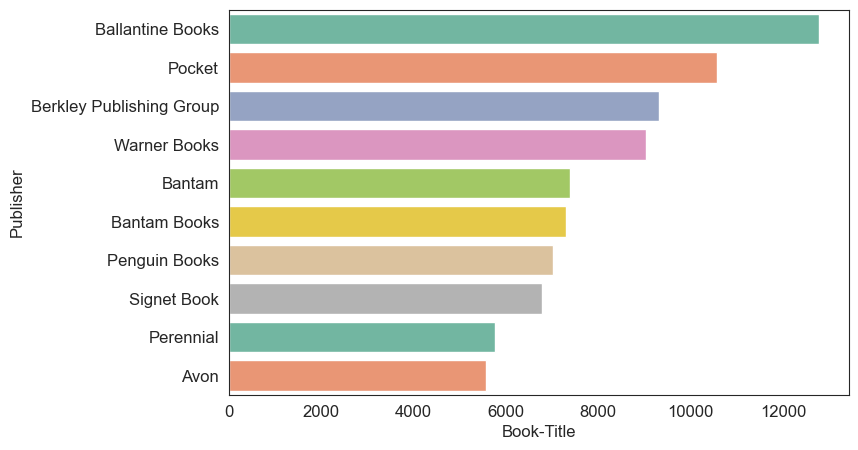

In [416]:
# Publisher with most books

publishers = data.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nagam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

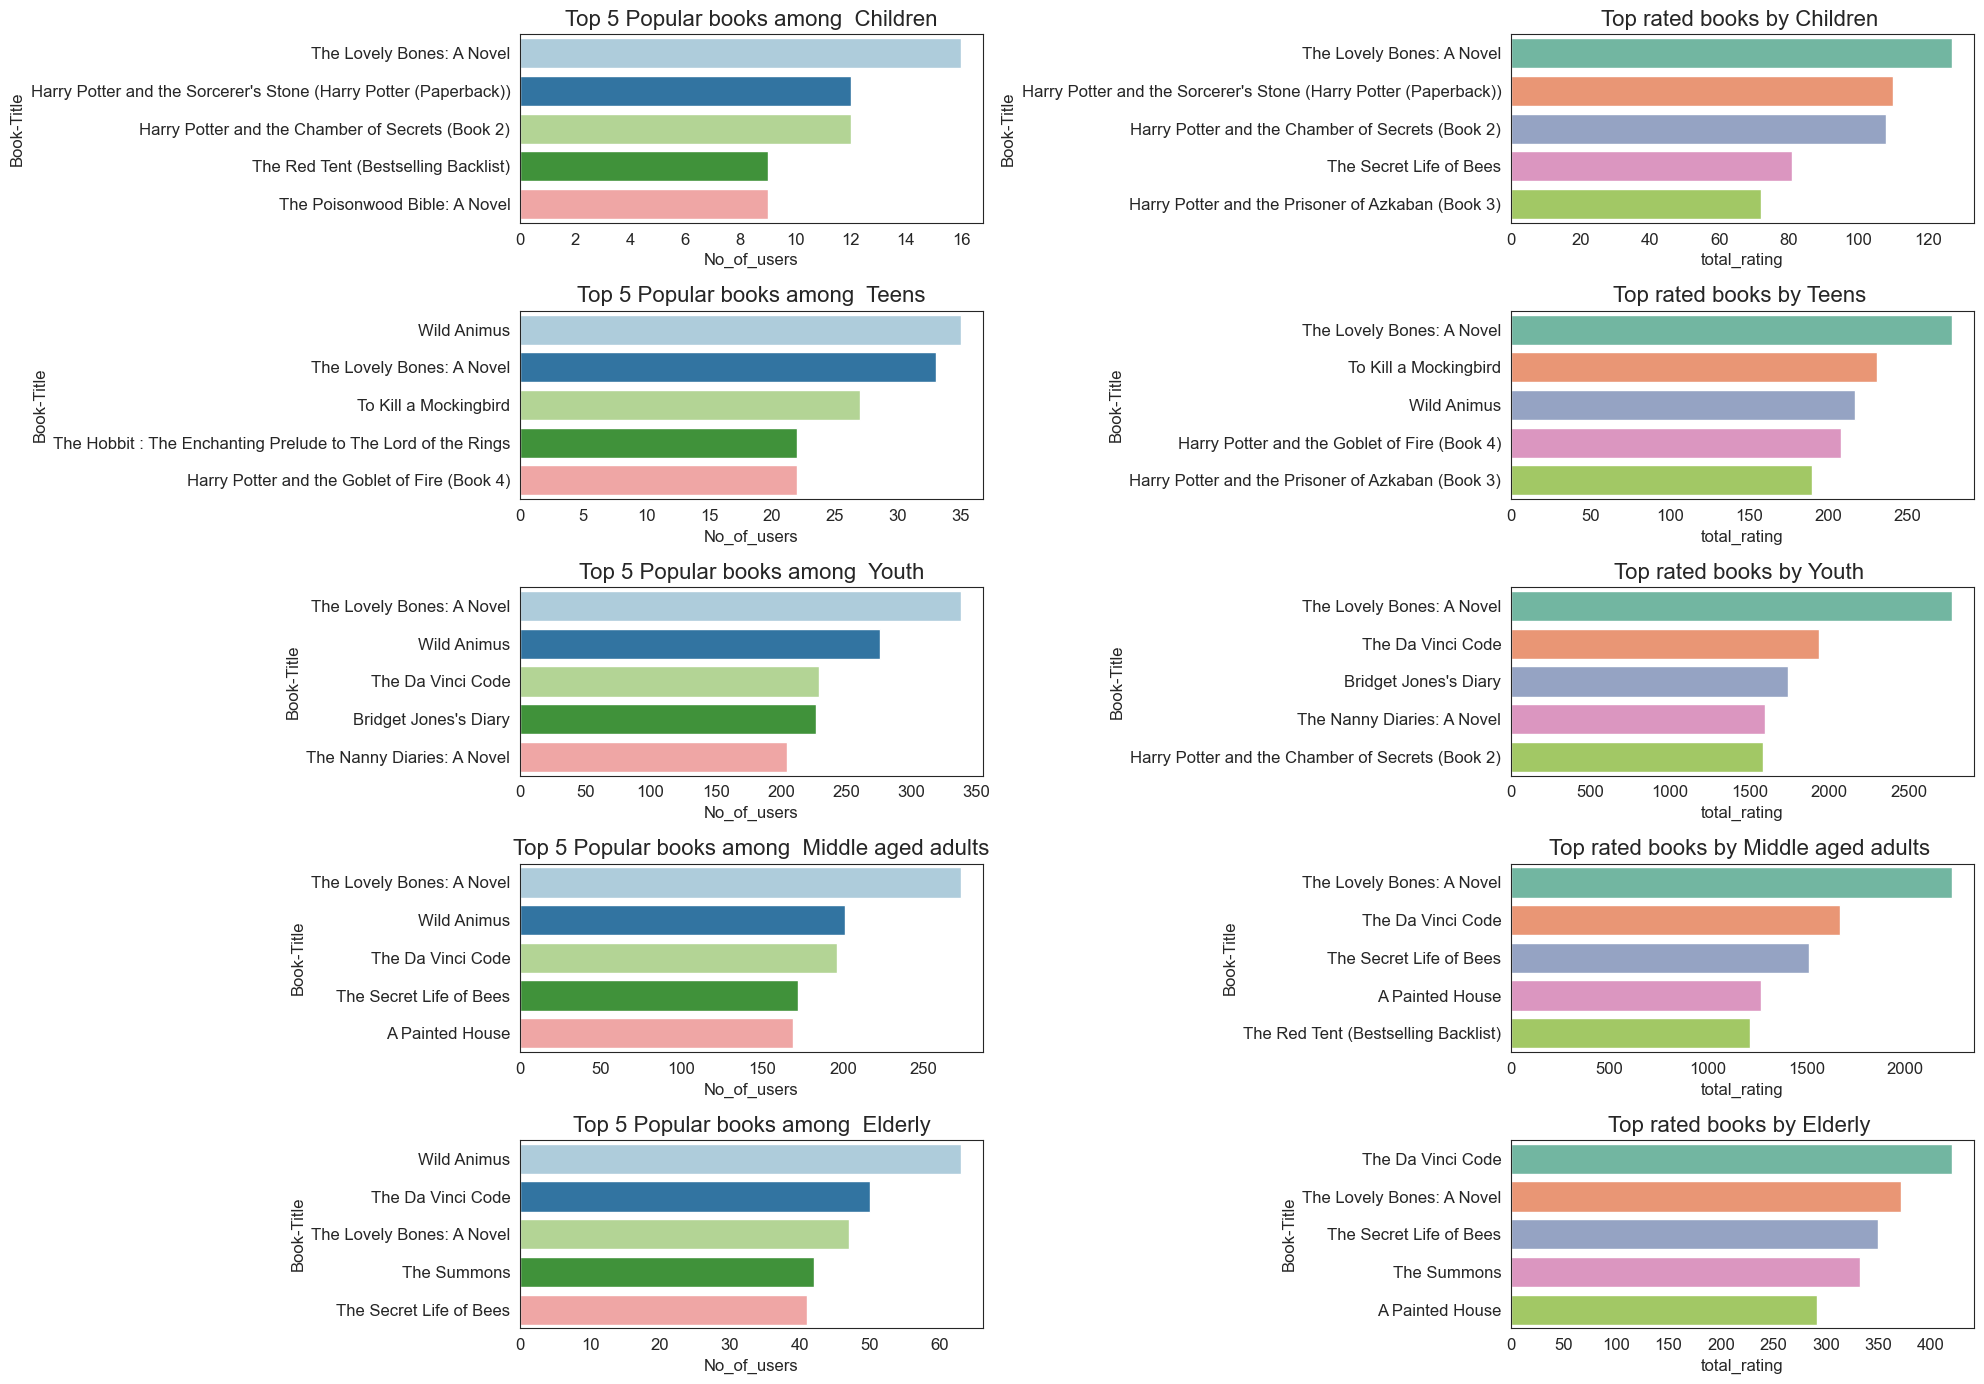

In [417]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age=data.loc[data['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

In [418]:
data.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.000,HarperFlamingo Canada,8,5,25.000,Youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.000,Scribner,8,5,25.000,Youth,CANADA


In [419]:
# function for getting most popular recommendations

def most_popular(data, n):
  if n >= 1 and n <= len(data):
    popular = data.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
    return pd.merge(popular, books, on='ISBN')
  return 'Please enter a valid value of n!'

In [420]:
most_popular(data, 3)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,ALICE SEBOLD,2002.000,"Little, Brown"
1,0971880107,581,Wild Animus,RICH SHAPERO,2004.000,Too Far
2,0385504209,487,The Da Vinci Code,DAN BROWN,2003.000,Doubleday


## **Country-based book recommendation**

In [336]:
# function for getting most popular recommendations country wise

def country_popular(data, country):
  if country in list(data.Country.unique()):
    return most_popular(data[data['Country'] == country], 5) # calling most_popular function to get popular recommendations
  return 'This country is not present in the dataset. Please enter some other country.'

In [423]:
country_popular(data, 'CANADA')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,62,The Lovely Bones: A Novel,ALICE SEBOLD,2002.000,"Little, Brown"
1,0971880107,53,Wild Animus,RICH SHAPERO,2004.000,Too Far
2,0671021001,41,She's Come Undone (Oprah's Book Club),WALLY LAMB,1998.000,Pocket
3,0440241073,41,The Summons,JOHN GRISHAM,2002.000,Dell Publishing Company
4,0312195516,40,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.000,Picador USA


## **Weighted average rating method**

Using Weighted average for each Book’s Average Rating

**W = (Rv + Cm)/(v + m)**

where

W= Weighted Rating

R = Average of the Books rating 

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [232]:
#finding the average rating and number of votes received by books
relevant_data = data.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=relevant_data['ratings_count']
R=relevant_data['avg_rating']
C=relevant_data['avg_rating'].mean()
m=int(relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.521552249503576 and the minimum number of votes required by the books to be listed is 4  


In [233]:
#Calculating weighted average rating of the books
relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [424]:
relevant_data.sort_values(by='weighted_average',ascending=False).head(5)

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
46515,Harry Potter and the Chamber of Secrets Postcard Book,J. K. ROWLING,9.870,23,9.520
122144,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. TOLKIEN,9.654,52,9.500
30141,Dilbert: A Book of Postcards,SCOTT ADAMS,9.923,13,9.360
81783,Postmarked Yesteryear: 30 Rare Holiday Postcards,PAMELA E. APKARIAN-RUSSELL,10.000,11,9.340
118126,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,9.397,78,9.310


## **Author based recommender system**

In [429]:
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.000,HarperFlamingo Canada,8,5,25.000,Youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.000,Scribner,8,5,25.000,Youth,CANADA
2,0887841740,The Middle Stories,SHEILA HETI,2004.000,House of Anansi Press,8,5,25.000,Youth,CANADA
3,1552041778,Jane Doe,R. J. KAISER,1999.000,Mira Books,8,5,25.000,Youth,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.000,Brilliance Audio - Trade,8,6,25.000,Youth,CANADA
...,...,...,...,...,...,...,...,...,...,...
383688,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,FRIEDRICH WILHELM NIETZSCHE,2000.000,Edaf,246590,6,20.000,Youth,SPAIN
383689,087004124X,Anthem,AYN RAND,1966.000,Caxton Press,259589,8,19.000,Youth,USA
383690,158243123X,A Student of Weather,ELIZABETH HAY,2001.000,Counterpoint Press,259591,8,39.000,Middle aged adults,USA
383691,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),GUSTAVO ADOLFO BÃ©CQUER,1981.000,Ediciones Fraile,259614,10,22.000,Youth,SPAIN


In [235]:
def author_based(book_title,number,relevant_data=relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=relevant_data.loc[relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
  author=relevant_data.loc[(relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)
  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec=author.loc[(author['Book-Title']!=book_title),['Book-Title','weighted_average']].head(number)
  return(top_rec)


In [431]:
book_title = 'Anthem'
number =5
author_based(book_title,number)

The author of the book Anthem is                                                                                            Book-Title  \
40582                                                                                    Fountainhead   
133097                                                                                  We the Living   
108190                                                                               The Fountainhead   
84253                                                  Rand Ayn : Atlas Shrugged (Signet Shakespeare)   
10153                                                                                  Atlas Shrugged   
58390                                                                                  LA SOURCE VIVE   
100734                                         The Art of Nonfiction: A Guide for Writers and Readers   
74036                                                                                        New Left   
74542                 

,Book-Title,weighted_average
40582,Fountainhead,9.010
133097,We the Living,8.740
108190,The Fountainhead,8.420
84253,Rand Ayn : Atlas Shrugged (Signet Shakespeare),8.260
10153,Atlas Shrugged,8.220


## **Memory Based Approach**

### **KNN Based Algorithm**

In [237]:
required_ratings = 3

user = data['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter = data[data['User-ID'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter.shape[0]))

Number of users with ratings more than 3 are: 313417


In [238]:
required = len(filter.ISBN.unique()) * 0.1

user_list = filter['Book-Title'].value_counts().head(int(required)).index.to_list()
filter = filter[filter['Book-Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter.shape[0]))

Number of top 10% users are: 167394


In [239]:
filter.shape

(167394, 10)

In [240]:
table = filter.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
".Hack: //Legend of the Twilight, Vol. 1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
table.fillna(0, inplace=True)
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
!Yo!,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
".Hack: //Legend of the Twilight, Vol. 1",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
one hundred years of solitude,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [242]:
from scipy.sparse import csr_matrix
sparse = csr_matrix(table)
sparse

<13403x14947 sparse matrix of type '<class 'numpy.float64'>'
	with 166539 stored elements in Compressed Sparse Row format>

In [243]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [244]:

def get_recommendations(name, n):

  book_id= np.where(table.index==name)[0][0]

  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):

    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [245]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
J. K. Rowling: The Wizard Behind Harry Potter
A Dash of Death
So Much to Tell You
Dragonquest Achille Cover


### **KNN with cosine metric**

In [246]:
model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [247]:

def get_cosine_recommendations(name, n):

  print('Cosine Similarity based recommendations.\n')

  distances, indices = model_cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)

  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[indices.flatten()[i]])
  return

In [440]:
get_cosine_recommendations('Anthem', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Anthem are:

Virtue of Selfishness: A New Concept of Egoism
The Dosadi Experiment
Fountainhead
The Glory Field
Children of Dune
The Sign of Four (Penguin Classics)
War and Remembrance
Sanctuary: The Corrected Text
Mythology : Timeless Tales of Gods and Heroes
The Chisellers


### KNN Model based on location

In [249]:
book_rating = data[['User-ID','ISBN','Book-Rating','Book-Title']]
print(book_rating.info())
print(book_rating.shape)
print(book_rating.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383693 entries, 0 to 383692
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      383693 non-null  int64 
 1   ISBN         383693 non-null  object
 2   Book-Rating  383693 non-null  int64 
 3   Book-Title   383693 non-null  object
dtypes: int64(2), object(2)
memory usage: 11.7+ MB
None
(383693, 4)
   User-ID        ISBN  Book-Rating  \
0        8  0002005018            5   
1        8  074322678X            5   
2        8  0887841740            5   
3        8  1552041778            5   
4        8  1567407781            6   

                                     Book-Title  
0                                  Clara Callan  
1       Where You'll Find Me: And Other Stories  
2                            The Middle Stories  
3                                      Jane Doe  
4  The Witchfinder (Amos Walker Mystery Series)  


In [250]:
book_rating = book_rating.dropna(axis=0, subset= ['Book-Title'])
book_ratingCount = (book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating' : 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [251]:
rating_with_totalRatingCount = book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how ='left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,8,0002005018,5,Clara Callan,9
1,8,074322678X,5,Where You'll Find Me: And Other Stories,1
2,8,0887841740,5,The Middle Stories,1
3,8,1552041778,5,Jane Doe,2
4,8,1567407781,6,The Witchfinder (Amos Walker Mystery Series),1


In [252]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   135510.000
mean         2.831
std          9.134
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        707.000
Name: totalRatingCount, dtype: float64


In [253]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    5.000
0.920    5.000
0.930    6.000
0.940    7.000
0.950    8.000
0.960   10.000
0.970   13.000
0.980   17.000
0.990   29.000
Name: totalRatingCount, dtype: float64


In [254]:
popularity_threshold = 100
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
8,11676,0399135782,9,The Kitchen God's Wife,115
10,11676,0440234743,9,The Testament,261
14,11676,0971880107,6,Wild Animus,581
15,11676,0345417623,10,Timeline,263
17,11676,0449005615,10,Seabiscuit: An American Legend,133


### Filtering to users in top 2 countries - US & Canada

In [255]:
combined = rating_popular_book.merge(users, left_on ='User-ID', right_on= 'User-ID', how='left')

us_canada_user_rating = combined[combined['Country'].str.contains("USA|CANADA")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis = 1)

us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Age_group,Country
225,67544,0316569321,7,White Oleander : A Novel,177,Youth,CANADA
226,67544,0316601950,8,The Pilot's Wife : A Novel,272,Youth,CANADA
229,210926,0440212561,10,Outlander,139,Middle aged adults,CANADA
230,263325,0446310786,10,To Kill a Mockingbird,267,Youth,CANADA
231,263325,0786868716,8,The Five People You Meet in Heaven,244,Youth,CANADA


### **Implementing KNN**

In [256]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot_table(index = 'Book-Title', columns= 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [257]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [258]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i==0:
        print('Recommendations for', format(us_canada_user_rating_pivot.index[query_index]), ':')
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Deception Point :
1: Digital Fortress : A Thriller, with distance of 0.8232466139007368:
2: Angels &amp; Demons, with distance of 0.8432908897680893:
3: The Da Vinci Code, with distance of 0.9421093670841723:
4: Q Is for Quarry, with distance of 0.9429138992491439:
5: Red Dragon, with distance of 0.9556593359044186:


## **Model Based Approach**


---


##  **Singular Value Decomposition**

In [259]:
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

In [260]:
print('The number of books that are explicitely rated are',explicit_rating['ISBN'].nunique())
ratings_count_df=explicit_rating.groupby("ISBN")['User-ID'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'ISBN'].unique())
print('Number of  books rated by atleast 5 users:',len(selected_books))
filter_df=explicit_rating.loc[explicit_rating['ISBN'].isin(selected_books)]

The number of books that are explicitely rated are 149655
Number of  books rated by atleast 5 users: 10731


In [261]:
print('The number of users who have explicitely rated books are',explicit_rating['User-ID'].nunique())
books_count_df=filter_df.groupby("User-ID")['ISBN'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'User-ID'].unique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))
filter_df=filter_df.loc[filter_df['User-ID'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The number of users who have explicitely rated books are 68080
Number of  users who have rated atleast 5 books are : 5911
The shape of data fame with filtered number of interactions :  (114147, 3)


In [262]:
complete_df = filter_df.copy()

In [263]:
complete_df['Book-Rating'].describe()

count   114147.000
mean         7.817
std          1.774
min          1.000
25%          7.000
50%          8.000
75%          9.000
max         10.000
Name: Book-Rating, dtype: float64

In [264]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
complete_df['Book-Rating']= complete_df['Book-Rating'].apply(smooth_user_preference)
complete_df.head()

,User-ID,ISBN,Book-Rating
177,276847,3404148576,3.170
179,276847,3423071516,3.459
186,276847,3442413508,3.459
189,276847,3442437717,3.000
190,276847,3442441080,3.459


In [265]:
train_df, test_df = train_test_split(complete_df,
                                   stratify=complete_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df)

# interactions on Train set: 91317
# interactions on Test set: 22830


In [266]:
test_df.head()

,User-ID,ISBN,Book-Rating
595435,143415,0804117683,2.585
1129708,271195,0061091502,3.170
921324,224430,0446675059,3.322
963425,232492,0553580191,3.459
415865,98783,0553290797,3.170


In [267]:
users_books_pivot_matrix_df = train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,881787017X,8838910170,8845205118,8845247414,8845915611,9074336329,950491036X,9681500555,968150108X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
243,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
244,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
254,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
388,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [268]:
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [269]:
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

In [270]:
NUMBER_OF_FACTORS_MF = 20
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)

In [271]:
sigma = np.diag(sigma)

 After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It has generated rating predictions for books with which users have not yet interacted (and therefore not rated), which we will use to recommend relevant books to the user.

In [272]:
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix 

array([[-4.04258460e-03,  5.55244996e-03,  3.55055121e-04, ...,
         1.50895745e-03,  2.40835026e-03, -4.47942990e-04],
       [ 2.39738748e-03,  7.31390062e-03,  1.06721793e-03, ...,
         2.41422467e-03, -2.50155111e-03,  7.07560167e-04],
       [ 2.76172022e-03,  2.46976045e-03,  3.93502515e-04, ...,
         7.51697062e-05, -3.15196343e-04,  4.15219598e-04],
       ...,
       [-3.77213135e-03,  4.35044249e-03,  7.91362149e-04, ...,
        -1.50838380e-03,  3.13716934e-04,  7.99373179e-05],
       [-9.99820694e-04, -5.55826794e-03, -1.68973261e-04, ...,
        -2.70869693e-04, -2.11730260e-03,  7.02884677e-03],
       [ 3.24745355e-03,  2.10480356e-03, -1.81779252e-04, ...,
        -3.05056878e-03, -1.71475791e-04,  2.70358799e-04]])

In [273]:
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,-0.004,0.002,0.003,-0.004,-0.000,-0.000,0.002,-0.001,0.005,0.014,...,0.001,0.001,-0.001,0.002,0.002,0.002,0.000,-0.004,-0.001,0.003
0002251760,0.006,0.007,0.002,0.021,0.001,0.001,0.002,0.004,0.004,0.015,...,-0.000,0.001,-0.001,0.005,-0.005,-0.000,0.001,0.004,-0.006,0.002
0002259834,0.000,0.001,0.000,0.002,0.000,0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.001,-0.000,-0.000
0002558122,-0.004,-0.003,0.002,-0.005,-0.000,-0.001,0.001,-0.000,0.002,0.014,...,-0.000,0.001,0.002,0.002,0.002,0.004,0.000,-0.005,-0.002,0.003
0006480764,-0.000,0.003,0.001,0.001,-0.000,0.000,0.001,-0.000,0.001,0.009,...,0.000,0.000,-0.002,-0.000,0.000,-0.000,0.000,0.000,0.009,-0.001


### **Building the Recommender model**

In [137]:
class CF_Recommender:
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions, items=None):
        self.cf_predictions_df = cf_predictions
        self.items_df = items
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author','Publisher']]

        return recommendations_df  
cf_recommender_model = CF_Recommender(predicted_ratings_df, books)

In [138]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [139]:
full_indexed_df =complete_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

Let's predict the relevant books for User ID 254.Before that,let's see the list of books that were already rated/purchased by this user.

In [334]:
print(f'These are  books that the user ID {user_ids[4]} has already rated \n')
books.loc[books['ISBN'].isin(list(get_items_interacted(user_ids[3],train_indexed_df)))]['Book-Title']

These are  books that the user ID 388 has already rated 



274                            The Golden Compass (His Dark Materials, Book 1)
282                                                        Making Minty Malone
285                                                                Animal Farm
356                                                    The Secret Life of Bees
485                                      She's Come Undone (Oprah's Book Club)
1175                                                             American Gods
2785                                       The Hobbit: or There and Back Again
2809                            Harry Potter and the Sorcerer's Stone (Book 1)
2969                                                 The Bonesetter's Daughter
3459                          Harry Potter and the Chamber of Secrets (Book 2)
3839                         Harry Potter and the Prisoner of Azkaban (Book 3)
4241                                                    American Gods: A Novel
5431                              Harry Potter and t

In [335]:
#Recommendation for a single user
print(f'Recommending books for User ID: {user_ids[4]} ')
cf_recommender_model.recommend_items(user_ids[4],items_to_ignore= get_items_interacted(user_ids[3],train_indexed_df),verbose=True)

Recommending books for User ID: 388 


,ISBN,Book-Title,Book-Author,Publisher
0,0440211727,A Time to Kill,JOHN GRISHAM,Dell
1,0440214041,The Pelican Brief,JOHN GRISHAM,Dell
2,0345370775,Jurassic Park,MICHAEL CRICHTON,Ballantine Books
3,0440236673,The Brethren,JOHN GRISHAM,Island
4,0440213525,The Client,JOHN GRISHAM,Dell Publishing Company
5,0440220602,The Chamber,JOHN GRISHAM,Dell Publishing Company
6,0440221471,The Runaway Jury,JOHN GRISHAM,Dell
7,0440224764,The Partner,JOHN GRISHAM,Dell Publishing Company
8,044023722X,A Painted House,JOHN GRISHAM,Dell Publishing Company
9,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,Perennial


### **Model Evaluation**

In [ ]:
def get_not_interacted_items_sample(person_id, sample_size, seed=42):
    interacted_items = get_items_interacted(person_id, full_indexed_df)
    all_items=set(full_indexed_df["ISBN"])
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

In [ ]:
#Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    def evaluate_model_for_user(self, model, person_id):
        interacted_values_testset = test_indexed_df.loc[person_id]
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        for item_id in person_interacted_items_testset:
            non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=42)
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics
    def evaluate_model(self, model):
        
        people_metrics = []
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
5910 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3102058694699956, 'recall@10': 0.42216381953569865}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
36,55,100,545,0.101,0.183,11676
202,44,73,139,0.317,0.525,98391
271,27,35,93,0.290,0.376,153662
60,27,32,88,0.307,0.364,16795
474,16,26,73,0.219,0.356,95359
485,42,54,72,0.583,0.750,114368
390,32,32,61,0.525,0.525,104636
456,15,22,54,0.278,0.407,158295
660,32,40,54,0.593,0.741,123883
659,7,13,53,0.132,0.245,35859


In [294]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [317]:
books = books.loc[:,['ISBN','Book-Title']]
df = pd.merge(books,ratings,on='ISBN')

In [318]:
df = df.reset_index()

In [319]:
sample_size = 15000
df = df.sample(n=sample_size,replace=False, random_state=490)

In [320]:
df = df.drop('index',axis=1)

In [321]:
reader = Reader() #the reader module is used to parse a normal dataset into a suprise dataset object
data_svd = Dataset.load_from_df(df[['User-ID','ISBN','Book-Rating']],reader)

In [322]:
data_svd

In [323]:
svd = SVD()

In [324]:
cross_validate(svd, data_svd, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    3.6647  3.6712  3.6964  3.6774  0.0137  
MAE (testset)     3.2636  3.2739  3.2885  3.2754  0.0102  
Fit time          0.26    0.44    0.40    0.37    0.08    
Test time         0.06    0.03    0.04    0.04    0.01    


{'test_rmse': array([3.66472746, 3.67116726, 3.69644467]),
 'test_mae': array([3.26364966, 3.27394918, 3.288505  ]),
 'fit_time': (0.2602829933166504, 0.4418299198150635, 0.39513325691223145),
 'test_time': (0.06277084350585938, 0.03284335136413574, 0.03848147392272949)}